<a href="https://colab.research.google.com/github/leman-cap13/NLP_projects/blob/main/NER_kapital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#name entity recognation

#EDA

In [ ]:
from datasets import load_dataset

dataset = load_dataset("wikiann", "az")
dataset["train"][0]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/81.3k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/80.6k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/769k [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

{'tokens': ['Lakin',
  'üsyana',
  'qoşulmuş',
  'zadəganlar',
  'xəyanət',
  'etdilər',
  ',',
  'üsyançılar',
  'döyüşdə',
  'məğlub',
  'oldular',
  'və',
  'Moskvadan',
  'Kaluqaya',
  'çəkildilər',
  '.'],
 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0],
 'langs': ['az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az',
  'az'],
 'spans': ['LOC: Moskvadan', 'LOC: Kaluqaya']}

In [ ]:
sample = dataset["train"][1]
print(sample)


{'tokens': ['Planlaşdırılan', 'səfərlərdən', 'biri', 'də', 'Latın', 'Amerikası', 'istiqamətində', 'olmuşdur', '.'], 'ner_tags': [0, 0, 0, 0, 5, 6, 0, 0, 0], 'langs': ['az', 'az', 'az', 'az', 'az', 'az', 'az', 'az', 'az'], 'spans': ['LOC: Latın Amerikası']}


In [ ]:
label_list = dataset["train"].features["ner_tags"].feature.names
print(label_list)


['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']


In [ ]:
print("Train samples:", len(dataset["train"]))
print("Validation samples:", len(dataset["validation"]))
print("Test samples:", len(dataset["test"]))


Train samples: 10000
Validation samples: 1000
Test samples: 1000


In [ ]:
tokens = sample["tokens"]
ner_ids = sample["ner_tags"]
ner_labels = [label_list[i] for i in ner_ids]

for token, label in zip(tokens, ner_labels):
    print(f"{token}\t{label}")


Planlaşdırılan	O
səfərlərdən	O
biri	O
də	O
Latın	B-LOC
Amerikası	I-LOC
istiqamətində	O
olmuşdur	O
.	O


In [ ]:
from collections import Counter

all_labels = []
for example in dataset['train']:
    all_labels.extend(example['ner_tags'])

label_counts = Counter(all_labels)
label_counts_named = {id2label[k]: v for k, v in label_counts.items()}

print("Label distribution in train dataset:")
for label, count in sorted(label_counts_named.items(), key=lambda x: x[1], reverse=True):
    print(f"{label}: {count}")


Label distribution in train dataset:
O: 56825
I-ORG: 8269
B-LOC: 5500
I-PER: 5229
B-PER: 3789
B-ORG: 3636
I-LOC: 2739


In [ ]:
total_tokens = sum(len(example['tokens']) for example in dataset['train'])
num_samples = len(dataset['train'])
avg_tokens_per_sample = total_tokens / num_samples

print(f"Total tokens in train dataset: {total_tokens}")
print(f"Average tokens per sample in train dataset: {avg_tokens_per_sample:.2f}")


Total tokens in train dataset: 85987
Average tokens per sample in train dataset: 8.60


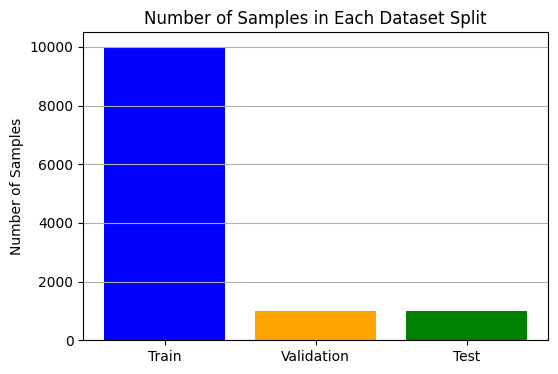

In [ ]:
import matplotlib.pyplot as plt

splits = ["Train", "Validation", "Test"]
counts = [len(dataset['train']), len(dataset['validation']), len(dataset['test'])]

plt.figure(figsize=(6,4))
plt.bar(splits, counts, color=['blue', 'orange', 'green'])
plt.title("Number of Samples in Each Dataset Split")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()


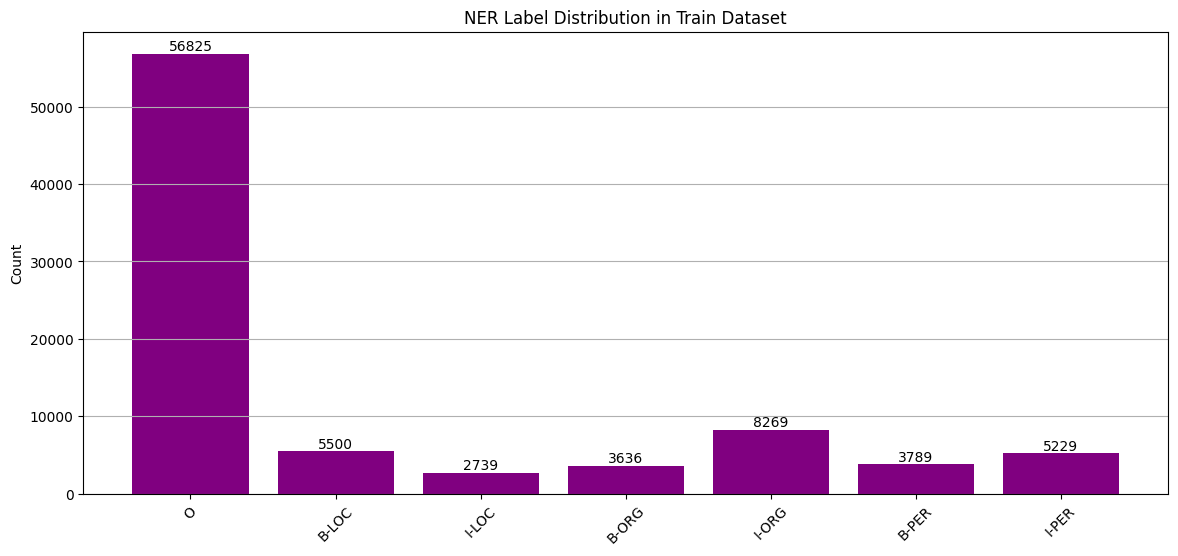

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

all_labels = []
for example in dataset['train']:
    all_labels.extend(example['ner_tags'])

label_counts = Counter(all_labels)
label_counts_named = {id2label[k]: v for k, v in label_counts.items()}

labels = list(label_counts_named.keys())
counts = list(label_counts_named.values())

plt.figure(figsize=(14,6))
bars = plt.bar(labels, counts, color='purple')
plt.xticks(rotation=45)
plt.title("NER Label Distribution in Train Dataset")
plt.ylabel("Count")
plt.grid(axis='y')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')

plt.show()


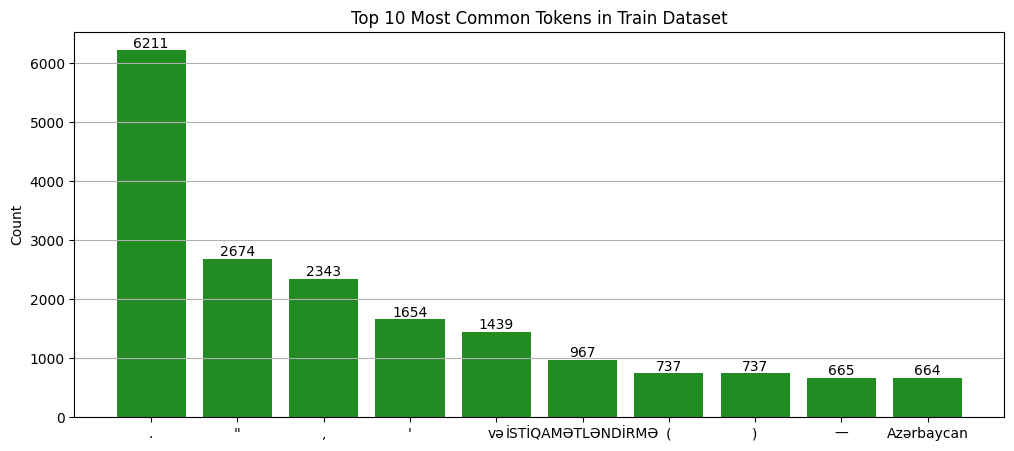

In [ ]:
from collections import Counter

all_tokens = []
for example in dataset['train']:
    all_tokens.extend(example['tokens'])

token_counts = Counter(all_tokens)
most_common_tokens = token_counts.most_common(10)

tokens, counts = zip(*most_common_tokens)

plt.figure(figsize=(12,5))
bars = plt.bar(tokens, counts, color='forestgreen')
plt.title("Top 10 Most Common Tokens in Train Dataset")
plt.ylabel("Count")
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')

plt.show()


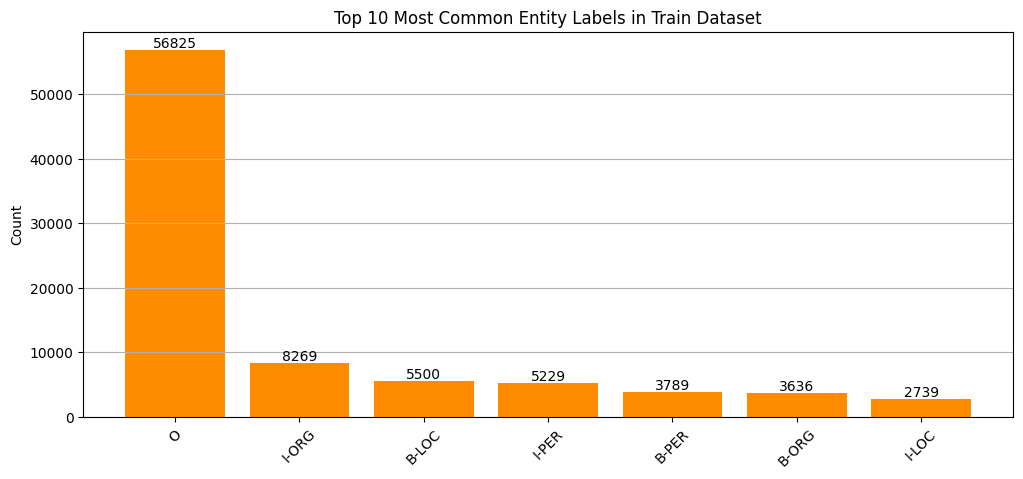

In [ ]:
most_common_labels = sorted(label_counts_named.items(), key=lambda x: x[1], reverse=True)[:10]

labels, counts = zip(*most_common_labels)

plt.figure(figsize=(12,5))
bars = plt.bar(labels, counts, color='darkorange')
plt.title("Top 10 Most Common Entity Labels in Train Dataset")
plt.ylabel("Count")
plt.grid(axis='y')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')

plt.show()


#Tokenizer

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
example = dataset["train"][0]
text = example["tokens"]

inputs = tokenizer(" ".join(text), is_split_into_words=False, return_offsets_mapping=True)

print(inputs.tokens())
print(inputs.input_ids)


['<s>', '▁Lakin', '▁', 'üs', 'yana', '▁qoşul', 'muş', '▁', 'zadə', 'gan', 'lar', '▁x', 'ə', 'yan', 'ət', '▁et', 'dilər', '▁', ',', '▁', 'üs', 'yan', 'çılar', '▁döyüş', 'də', '▁məğlub', '▁oldu', 'lar', '▁və', '▁Moskva', 'dan', '▁Ka', 'luq', 'aya', '▁çəki', 'l', 'dilər', '▁', '.', '</s>']
[0, 50199, 6, 26806, 28477, 151439, 21154, 6, 46167, 1972, 320, 1022, 1354, 1643, 9485, 82, 46940, 6, 4, 6, 26806, 1643, 70928, 78755, 1477, 160857, 7037, 320, 530, 43390, 549, 1136, 27700, 5822, 50128, 141, 46940, 6, 5, 2]


In [ ]:
# label listi datasetin özündən alınır
label_list = dataset["train"].features["ner_tags"].feature.names
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}


In [ ]:
label_list

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [ ]:
label2id

{'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-ORG': 3,
 'I-ORG': 4,
 'B-LOC': 5,
 'I-LOC': 6}

In [ ]:
id2label

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

#Label alignment

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"],
        truncation=True,
        is_split_into_words=True,

    )

    all_labels = []
    for i in range(len(examples["tokens"])):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        labels = []
        previous_word_idx = None
        for word_idx in word_ids:
            if word_idx is None:
                labels.append(-100)
            elif word_idx != previous_word_idx:
                labels.append(examples["ner_tags"][i][word_idx])
            else:
                labels.append(-100)
            previous_word_idx = word_idx
        all_labels.append(labels)

    tokenized_inputs["labels"] = all_labels
    return tokenized_inputs


In [ ]:
tokenized_dataset = dataset.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=dataset["train"].column_names
)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
print(tokenizer.__class__)
print(tokenizer.is_fast)


<class 'transformers.models.xlm_roberta.tokenization_xlm_roberta_fast.XLMRobertaTokenizerFast'>
True


#Data Loader

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)



In [ ]:
# Tokenləşdirilmiş dataset-i PyTorch formatına çeviririk
tokenized_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_dataset["train"], batch_size=16, shuffle=True, collate_fn=data_collator
)
valid_dataloader = DataLoader(
    tokenized_dataset["validation"], batch_size=16, shuffle=False, collate_fn=data_collator
)
test_dataloader = DataLoader(
    tokenized_dataset["test"], batch_size=16, shuffle=False, collate_fn=data_collator
)


In [ ]:
from transformers import AutoModelForTokenClassification

label_list = dataset["train"].features["ner_tags"].feature.names
num_labels = len(label_list)

model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)


Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#Accelerator, optimizer, lr_scheduler

In [ ]:
import torch
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=1e-5)

In [ ]:
from transformers import get_scheduler

num_train_epochs = 5
num_training_steps = num_train_epochs * len(train_dataloader)

lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

In [ ]:
from accelerate import Accelerator

accelerator = Accelerator()
model, optimizer, train_dataloader, valid_dataloader, test_dataloader = accelerator.prepare(
    model, optimizer, train_dataloader, valid_dataloader, test_dataloader
)

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.3 MB/s eta 0:00:00


#Custom loop train

In [ ]:
from tqdm.auto import tqdm
import evaluate

metric = evaluate.load("seqeval")
progress_bar = tqdm(range(num_training_steps))

loss_history = []
eval_history = []


for epoch in range(num_train_epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss
        accelerator.backward(loss)
        optimizer.step()
        lr_scheduler.step()
        total_loss += loss.item()
        progress_bar.update(1)

    avg_loss = total_loss / len(train_dataloader)
    loss_history.append(avg_loss)


    model.eval()
    all_preds, all_labels = [], []
    for batch in valid_dataloader:
        with torch.no_grad():
            outputs = model(**batch)

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        labels = batch["labels"]


        preds, true = [], []
        for pred_seq, label_seq in zip(predictions, labels):
            preds.append([
                id2label[p.item()] for p, l in zip(pred_seq, label_seq) if l != -100
            ])
            true.append([
                id2label[l.item()] for p, l in zip(pred_seq, label_seq) if l != -100
            ])
        all_preds.extend(preds)
        all_labels.extend(true)

    results = metric.compute(predictions=all_preds, references=all_labels)
    f1 = results["overall_f1"]
    eval_history.append(f1)
    print(f"Validation F1 score: {f1:.4f}")


  0%|          | 0/3125 [00:00<?, ?it/s]

Validation F1 score: 0.9045
Validation F1 score: 0.9008
Validation F1 score: 0.9116
Validation F1 score: 0.9095
Validation F1 score: 0.9076


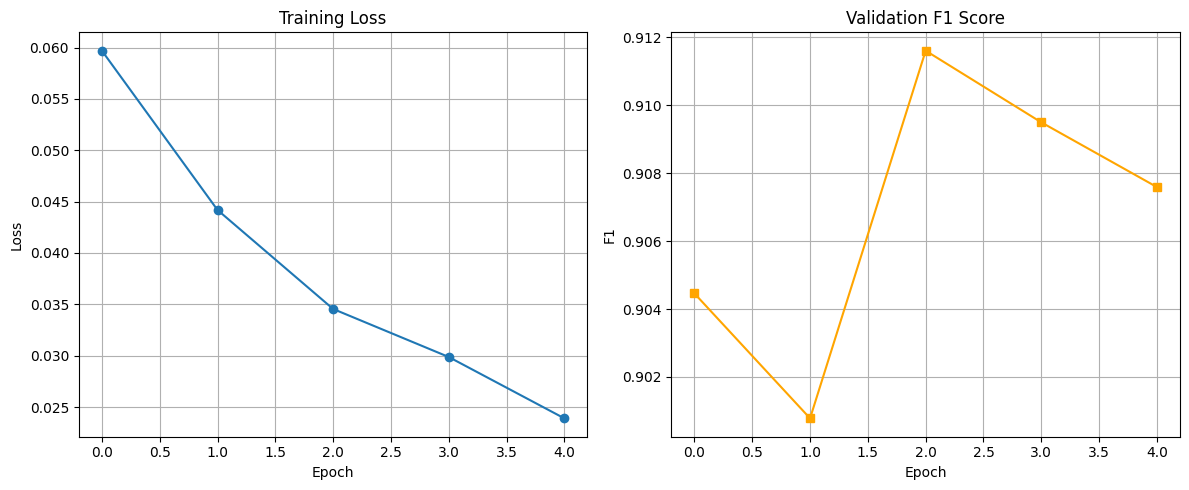

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(loss_history, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(eval_history, marker='s', color='orange')
plt.title("Validation F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1")
plt.grid(True)

plt.tight_layout()
plt.show()

The model was initially experiencing early saturation, where the F1 score plateaued early and training loss stopped improving. This was likely due to a low learning signal. I increased the learning rate from 5e-5 to 1e-5 and extended the number of training epochs, which helped the model escape the plateau. As a result, the F1 score improved, and the loss curve showed continued learning progress.

After adjusting the learning rate from 5e-5 to 1e-5 and increasing the number of training epochs, the model showed clear improvement. The training loss decreased consistently, while the validation F1 score peaked at epoch 2, indicating better learning and overcoming early saturation. However, slight overfitting appears after epoch 2, suggesting that early stopping should be applied at this point to retain optimal performance

#Evaluation metrics

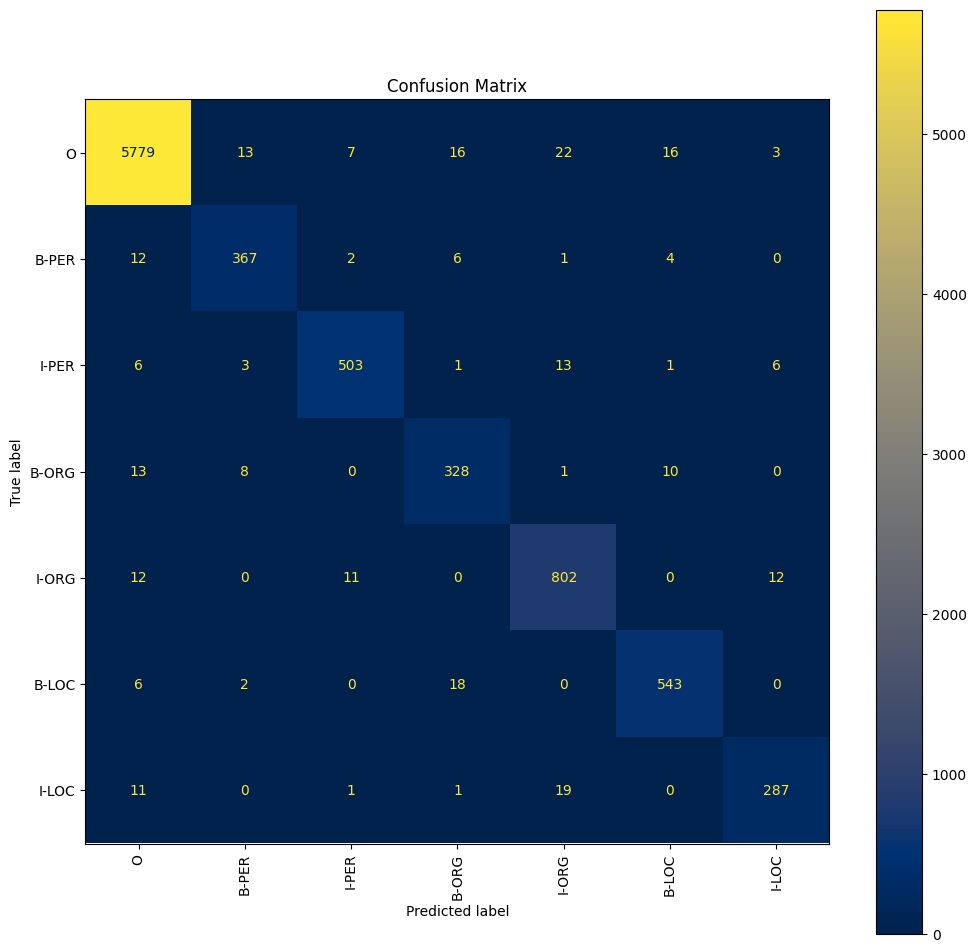

              precision    recall  f1-score   support

           O       0.99      0.99      0.99      5856
       B-PER       0.93      0.94      0.94       392
       I-PER       0.96      0.94      0.95       533
       B-ORG       0.89      0.91      0.90       360
       I-ORG       0.93      0.96      0.95       837
       B-LOC       0.95      0.95      0.95       569
       I-LOC       0.93      0.90      0.92       319

    accuracy                           0.97      8866
   macro avg       0.94      0.94      0.94      8866
weighted avg       0.97      0.97      0.97      8866



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


true_labels_flat = []
pred_labels_flat = []

for true_seq, pred_seq in zip(all_labels, all_preds):
    true_labels_flat.extend(true_seq)
    pred_labels_flat.extend(pred_seq)




labels = list(label2id.keys())  # bütün siniflər (məsələn: ['O', 'B-PER', 'I-PER', ...])

cm = confusion_matrix(true_labels_flat, pred_labels_flat, labels=labels)

fig, ax = plt.subplots(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap=plt.cm.cividis, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

print(classification_report(true_labels_flat, pred_labels_flat, labels=labels))


#Prediction

In [ ]:
def predict_words(text, tokenizer, model, label_list, device='cuda'):
    model.eval()

    words = text.strip().split()

    inputs = tokenizer(
        words,
        is_split_into_words=True,
        return_tensors="pt",
        padding=True,
        truncation=True
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1).squeeze().cpu().numpy()
    input_ids = inputs["input_ids"].squeeze().cpu().numpy()
    word_ids = inputs.word_ids()  # Bura əsasdır: Hər token hansı sözə aiddir deyir

    # Hər söz üçün yalnız bir prediction götürmək üçün:
    final_predictions = []
    previous_word_idx = None

    for idx, word_idx in enumerate(word_ids):
        if word_idx is None or word_idx == previous_word_idx:
            continue  # subword və ya special tokenlər
        label_id = predictions[idx]
        label = label_list[label_id]
        final_predictions.append((words[word_idx], label))
        previous_word_idx = word_idx

    return final_predictions




In [ ]:
text = "OpenAI şirkəti 2025-ci ildə Bakıda keçirilən Beynəlxalq Süni İntellekt Konfransında GPT-5 modelini təqdim etdi."

predictions = predict_words(text, tokenizer, model, label_list)

for word, label in predictions:
    print(f"{word:<10} {label}")

OpenAI     B-ORG
şirkəti    O
2025-ci    B-ORG
ildə       O
Bakıda     B-LOC
keçirilən  O
Beynəlxalq B-ORG
Süni       I-ORG
İntellekt  I-ORG
Konfransında I-ORG
GPT-5      O
modelini   O
təqdim     O
etdi.      O


#part 2 TrainingArguments, Trainer

In [ ]:
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_labels = [
        [label_list[l] for (l, pred) in zip(label_seq, pred_seq) if l != -100]
        for label_seq, pred_seq in zip(labels, predictions)
    ]
    true_predictions = [
        [label_list[pred] for (l, pred) in zip(label_seq, pred_seq) if l != -100]
        for label_seq, pred_seq in zip(labels, predictions)
    ]

    report = classification_report(true_labels, true_predictions, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    return {
        "precision": classification_report(true_labels, true_predictions, output_dict=True)['weighted avg']['precision'],
        "recall": classification_report(true_labels, true_predictions, output_dict=True)['weighted avg']['recall'],
        "f1": f1,
    }


In [ ]:
from transformers import AutoModelForTokenClassification, AutoTokenizer, TrainingArguments, Trainer
from datasets import load_dataset
import numpy as np
from seqeval.metrics import classification_report

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)


/tmp/ipython-input-44-1888981020.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()
trainer.evaluate()


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Epoch,Training Loss,Validation Loss,Precision,Recall,F1
1,0.074800,0.128694,0.890779,0.898562,0.894450
2,0.050800,0.151810,0.895712,0.901590,0.898492
3,0.031200,0.160874,0.899823,0.914459,0.907052


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


{'eval_loss': 0.1608744114637375,
 'eval_precision': 0.899823302136869,
 'eval_recall': 0.9144587433762301,
 'eval_f1': 0.9070520028226089,
 'eval_runtime': 2.8024,
 'eval_samples_per_second': 356.843,
 'eval_steps_per_second': 22.481,
 'epoch': 3.0}